In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

import random


np.random.seed(0)

(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 

(60000, 28, 28)
(10000, 28, 28)


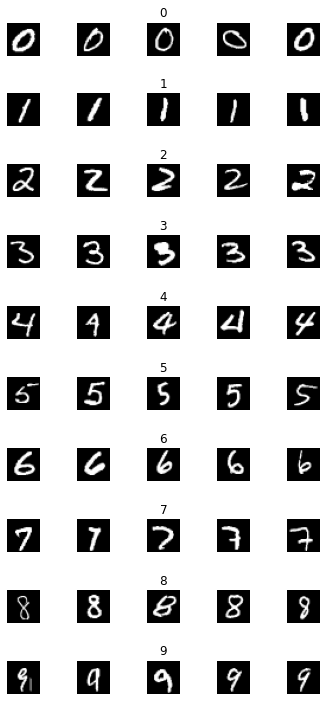

In [2]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


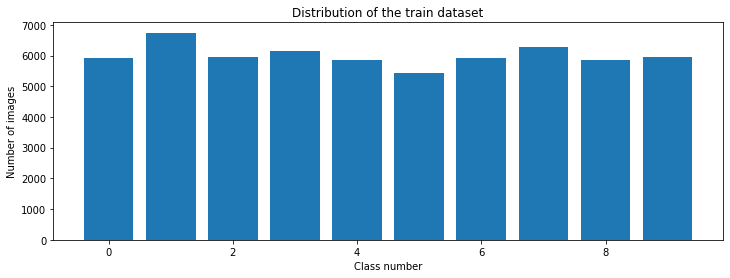

In [3]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255




In [5]:
#define the leNet Model function

def leNet_Model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu')) # 1st hidden layer
  model.add(Dense(num_classes, activation='softmax')) # output layer
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [6]:
model = leNet_Model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 14s 25ms/step - loss: 0.2006 - accuracy: 0.9349 - val_loss: 0.0502 - val_accuracy: 0.9853
Epoch 2/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0421 - val_accuracy: 0.9892
Epoch 3/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0444 - val_accuracy: 0.9882
Epoch 4/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 5/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 6/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0415 - val_accuracy: 0.9898
Epoch 7/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0441 - val_accuracy: 0.988

Text(0.5, 0, 'epoch')

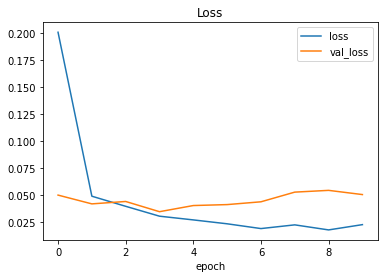

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

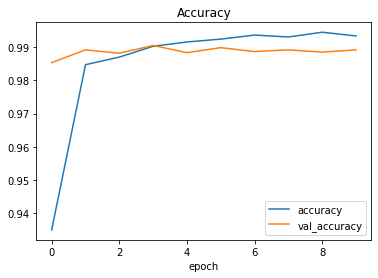

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.05763673782348633
Test accuracy: 0.9864000082015991


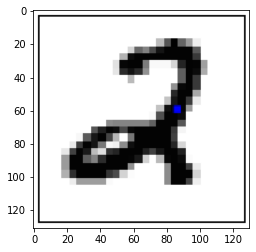

In [19]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

predicted digit: 2


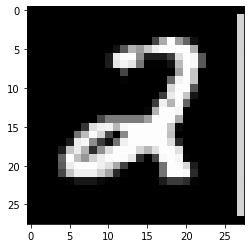

In [20]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 28, 28, 1)
 
prediction = model.predict(img)
prediction = np.argmax(prediction)
print("predicted digit:", str(prediction))